# Hove and Zhang ML Project

### Import Libraries and Data

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [36]:
filename=('heart_attack_prediction_dataset.csv')
df=pd.read_csv(filename)
df = pd.DataFrame(df)
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


## Data Cleaning

In [37]:
# Checking the data shape
df.shape

(8763, 26)

In [38]:
## Check for null values
for col in df.columns:
    num_nulls = df[col].isnull().sum()
    num_not_null = df[col].notnull().sum()
    pct_nulls = (num_nulls / len(df)) * 100
    print(f"Column: {col}\n Number null: {num_nulls}\n Number not null: {num_not_null}\n Proportion null: {pct_nulls:.2f}%")

Column: Patient ID
 Number null: 0
 Number not null: 8763
 Proportion null: 0.00%
Column: Age
 Number null: 0
 Number not null: 8763
 Proportion null: 0.00%
Column: Sex
 Number null: 0
 Number not null: 8763
 Proportion null: 0.00%
Column: Cholesterol
 Number null: 0
 Number not null: 8763
 Proportion null: 0.00%
Column: Blood Pressure
 Number null: 0
 Number not null: 8763
 Proportion null: 0.00%
Column: Heart Rate
 Number null: 0
 Number not null: 8763
 Proportion null: 0.00%
Column: Diabetes
 Number null: 0
 Number not null: 8763
 Proportion null: 0.00%
Column: Family History
 Number null: 0
 Number not null: 8763
 Proportion null: 0.00%
Column: Smoking
 Number null: 0
 Number not null: 8763
 Proportion null: 0.00%
Column: Obesity
 Number null: 0
 Number not null: 8763
 Proportion null: 0.00%
Column: Alcohol Consumption
 Number null: 0
 Number not null: 8763
 Proportion null: 0.00%
Column: Exercise Hours Per Week
 Number null: 0
 Number not null: 8763
 Proportion null: 0.00%
Column:

In [39]:
# Check for duplicate records
df.duplicated().sum()


0

In [40]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [41]:
df=df.drop(columns={'Patient ID'})

## Visualizing the data

### Distribution of Risk


Text(0.5, 1.0, 'Distribution for Heart Attack Classification')

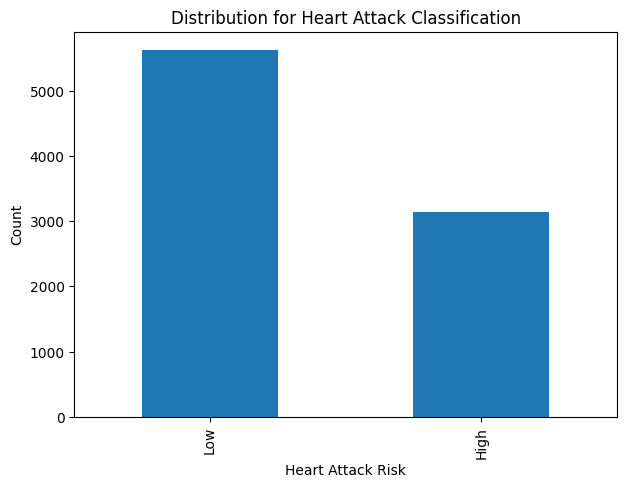

In [42]:
df['Heart Attack Risk'] = df['Heart Attack Risk'].map({0: 'Low', 1: 'High'})

df['Heart Attack Risk'] = df['Heart Attack Risk'].astype('category')

plt.figure(figsize=(7,5))
df['Heart Attack Risk'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('Distribution for Heart Attack Classification')

### Categorical Variables

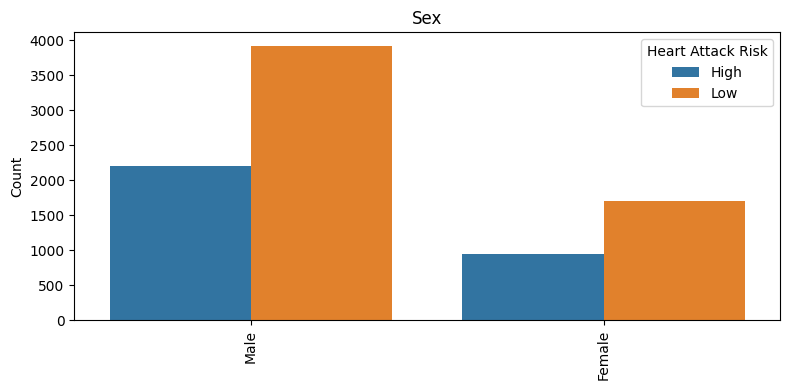

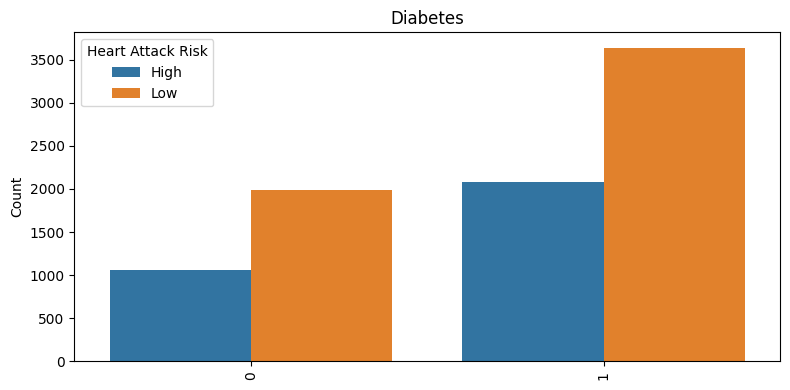

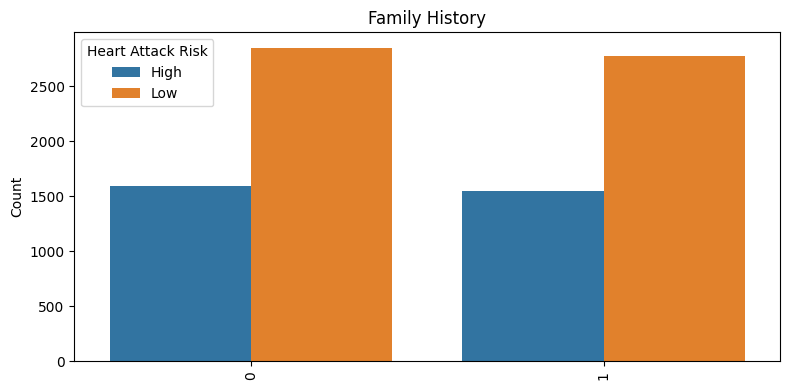

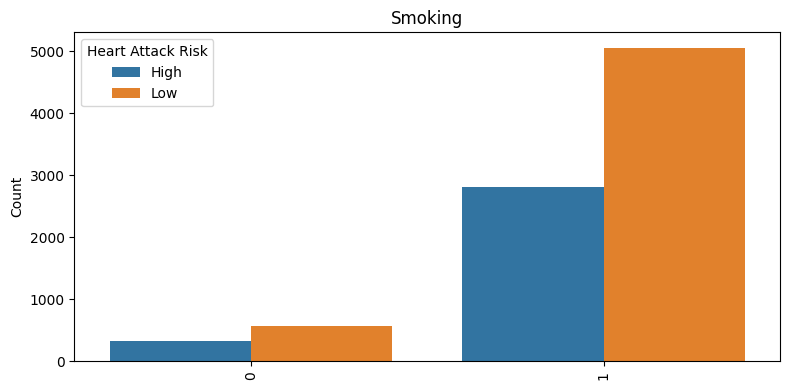

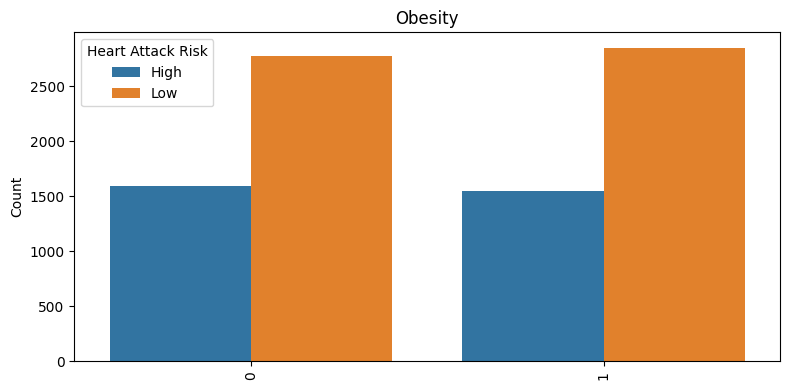

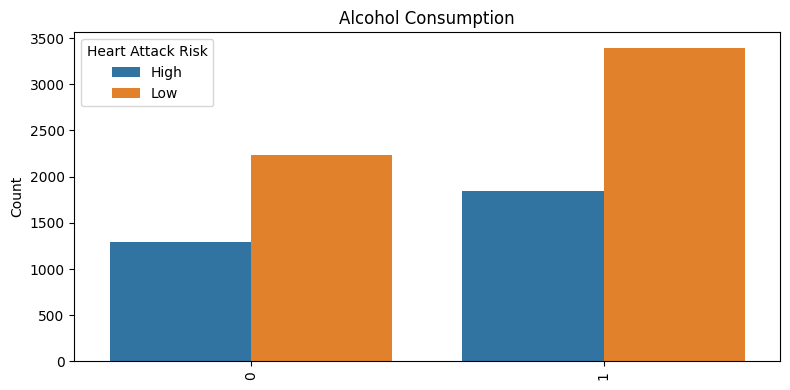

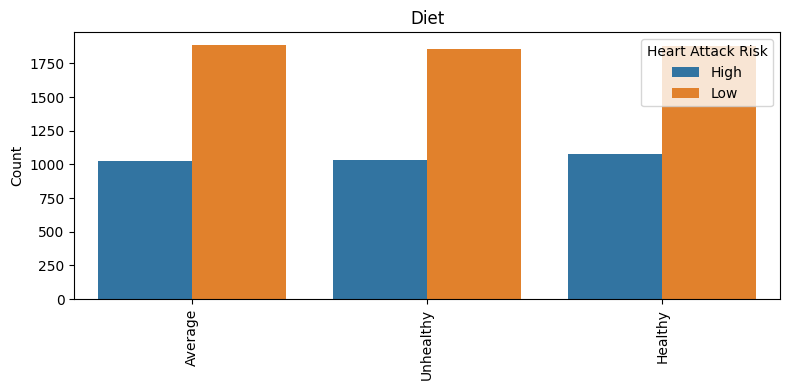

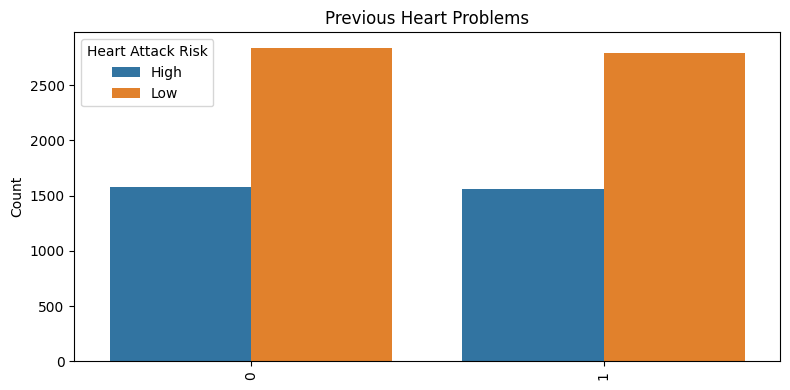

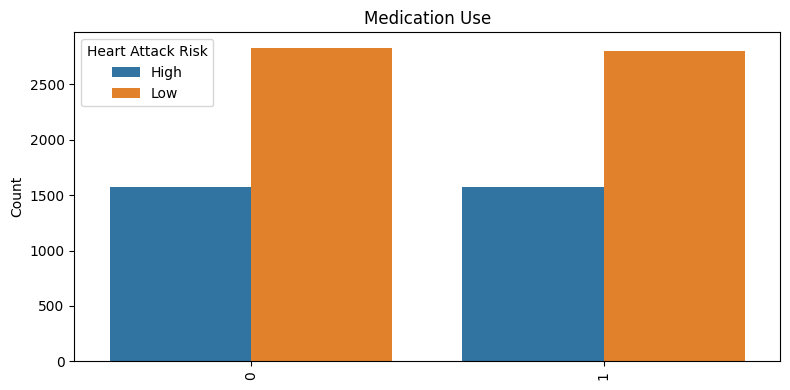

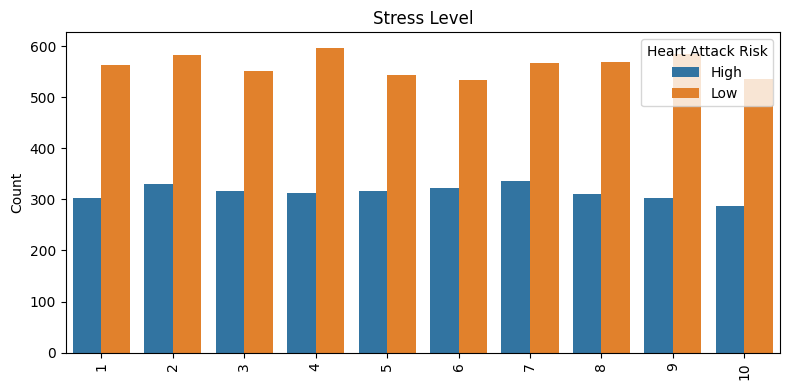

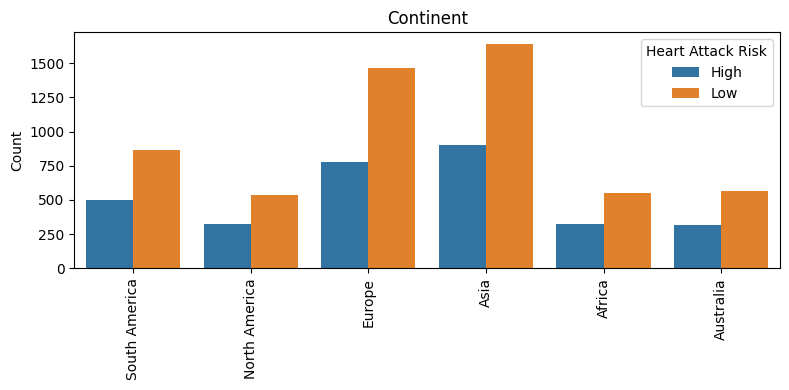

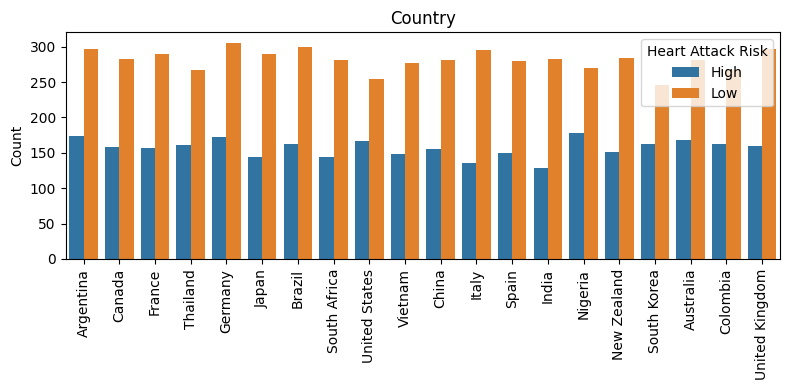

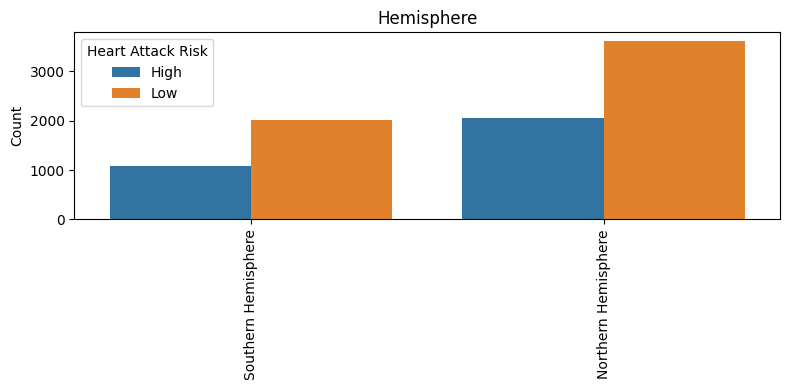

In [43]:
categorical_columns = [
    'Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Diet', 
    'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Continent', 'Country', 'Hemisphere',
]

# Plot histograms for each categorical variable with respect to Heart Risk
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=column, hue='Heart Attack Risk')
    plt.title(f'{column}')
    plt.ylabel('Count')
    plt.legend(title='Heart Attack Risk')
    plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees
    plt.xlabel('')
    plt.tight_layout()
    plt.show()

### Numerical Variables

In [44]:
# Split the 'Blood Pressure' column into 'Systolic_BP' and 'Diastolic_BP' columns
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns to integers
df['Systolic_BP'] = df['Systolic_BP'].astype(int)
df['Diastolic_BP'] = df['Diastolic_BP'].astype(int)

# Drop the original 'Blood Pressure' column
df = df.drop(columns=['Blood Pressure'])

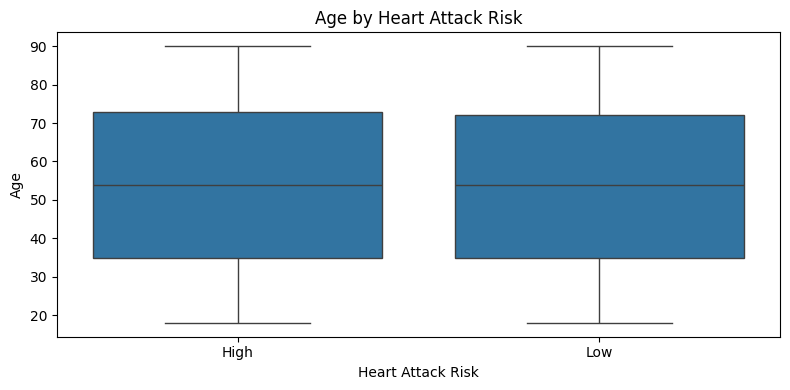

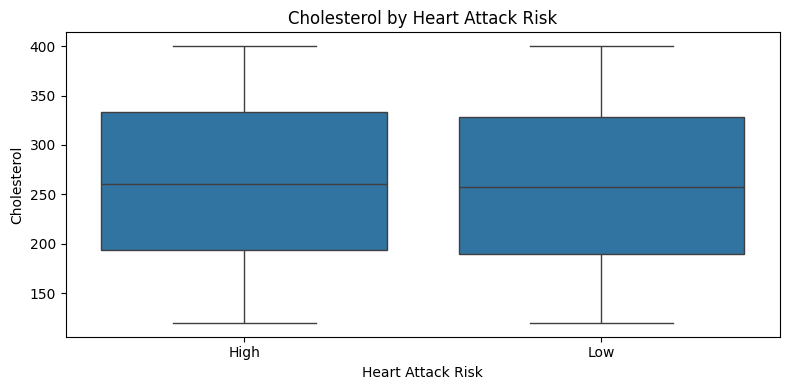

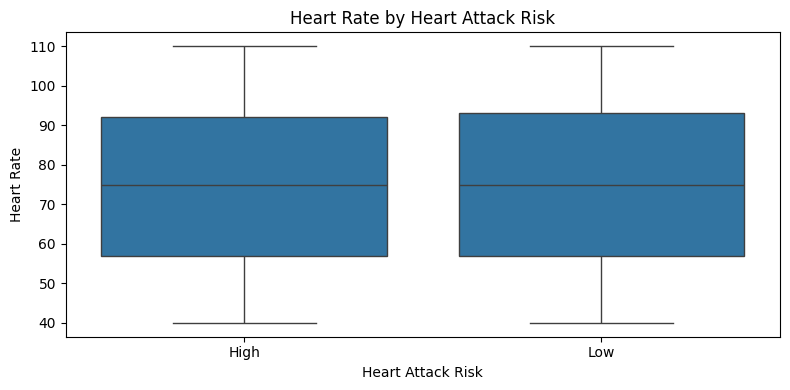

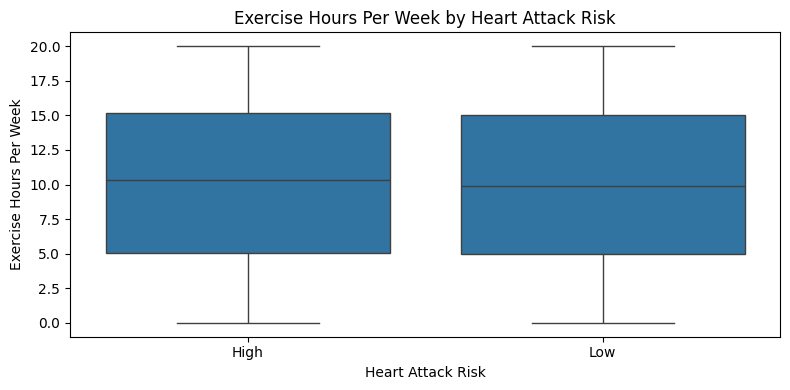

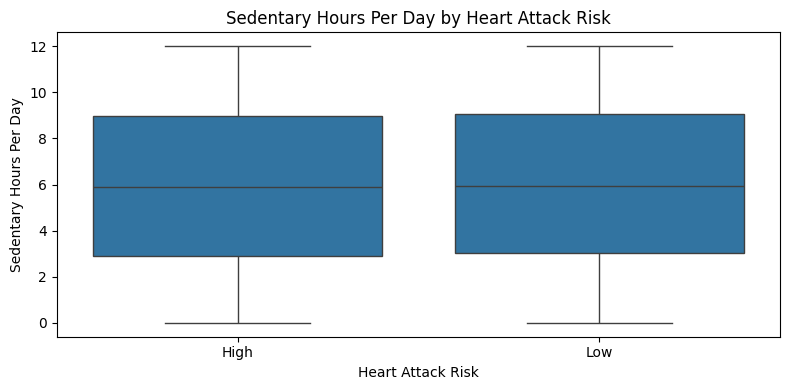

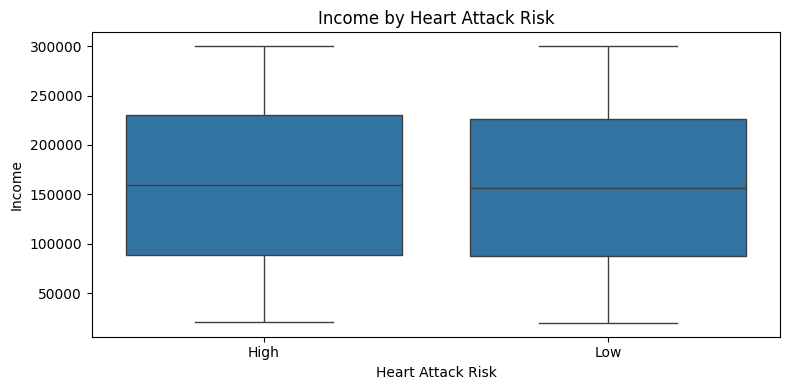

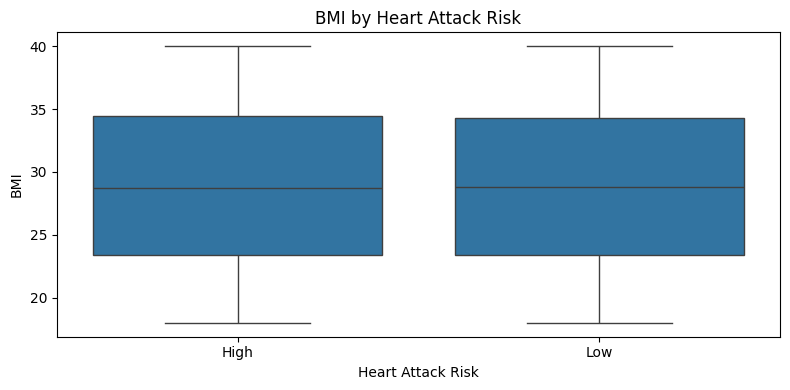

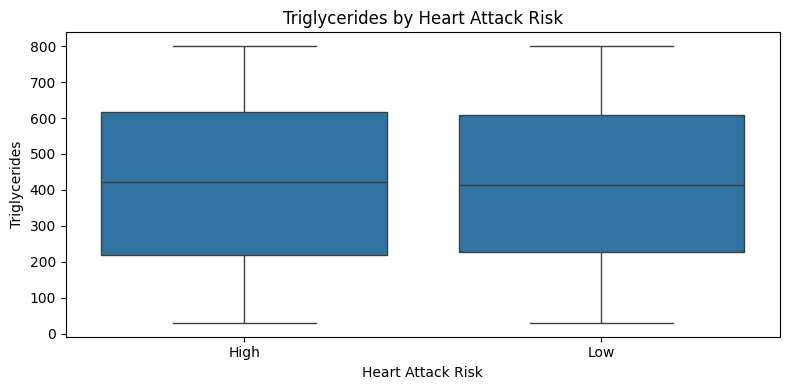

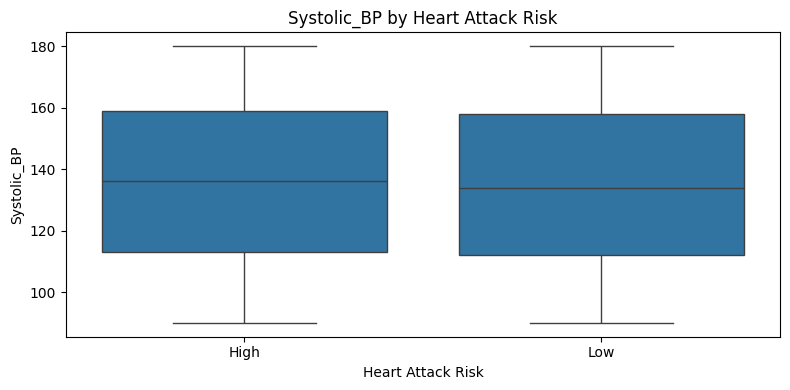

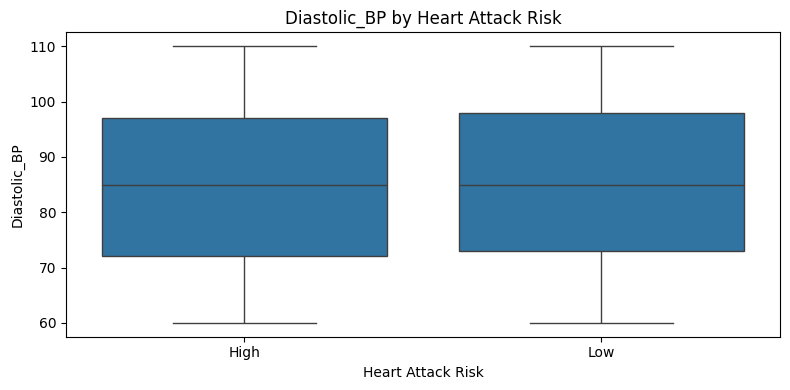

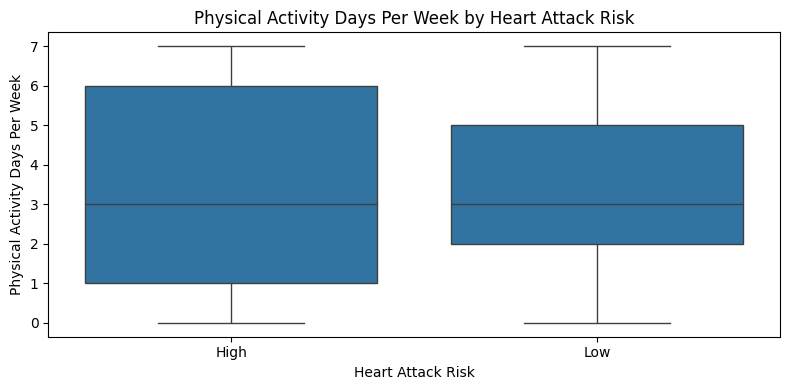

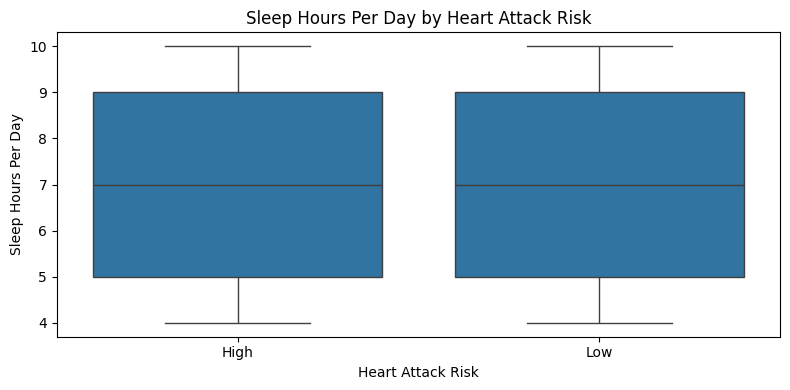

In [45]:
# Plot box plots for each numeric variable with respect to Heart Attack Risk

numerical_columns = [
    'Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Sedentary Hours Per Day', 
    'Income', 'BMI', 'Triglycerides', 'Systolic_BP', 'Diastolic_BP', 'Physical Activity Days Per Week', 'Sleep Hours Per Day'
]

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Heart Attack Risk', y=column, data=df)
    plt.title(f'{column} by Heart Attack Risk')
    plt.xlabel('Heart Attack Risk')
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()

## FEATURE SELECTION

### CHI SQUARED TEST ON CATEGORICAL VARIABLES

In [46]:

# Factoring Categorical variables 
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})
df['Diet'] = df['Diet'].map({'Unhealthy': 0, 'Healthy': 1, 'Average': 0.5})

continent_mapping = {'Asia': 0, 'Europe': 1, 'North America': 2, 'South America': 3, 'Africa': 4, 'Australia': 5}
df['Continent'] = df['Continent'].map(continent_mapping)

hemisphere_mapping = {'Northern Hemisphere': 0, 'Southern Hemisphere': 1}
df['Hemisphere'] = df['Hemisphere'].map(hemisphere_mapping)

df['Heart Attack Risk'] = df['Heart Attack Risk'].map({'High':1,'Low':0})

#df['Heart Attack Risk'] = df['Heart Attack Risk'].astype('category')

df1 =df


In [47]:
from scipy.stats import chi2_contingency


# Select only the categorical columns
categorical_columns

# Perform chi-squared test for each categorical variable
chi2_results = {}
for column in categorical_columns:
    contingency_table = pd.crosstab(df['Heart Attack Risk'], df[column])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi2_results[column] = {'chi2': chi2, 'p-value': p, 'dof': dof}

# Display the results
chi2_results_df = pd.DataFrame(chi2_results).T
chi2_results_df

,chi2,p-value,dof
Sex,0.070494,0.790619,1.0
Diabetes,2.525189,0.112041,1.0
Family History,0.017518,0.894703,1.0
Smoking,0.117389,0.731884,1.0
Obesity,1.499127,0.220806,1.0
Alcohol Consumption,1.605344,0.205148,1.0
Diet,0.954742,0.620412,2.0
Previous Heart Problems,0.000011,0.997344,1.0
Medication Use,0.034926,0.851751,1.0
Stress Level,5.147331,0.821281,9.0


In [48]:
# Select the columns with p-value < 0.5
significant_columns = chi2_results_df[chi2_results_df['p-value'] < 0.5].index

print(f"The columns with p-value < 0.5 are: {', '.join(significant_columns)}")

The columns with p-value < 0.5 are: Diabetes, Obesity, Alcohol Consumption, Country, Hemisphere


## Correlation Matrix of Numeric Variables

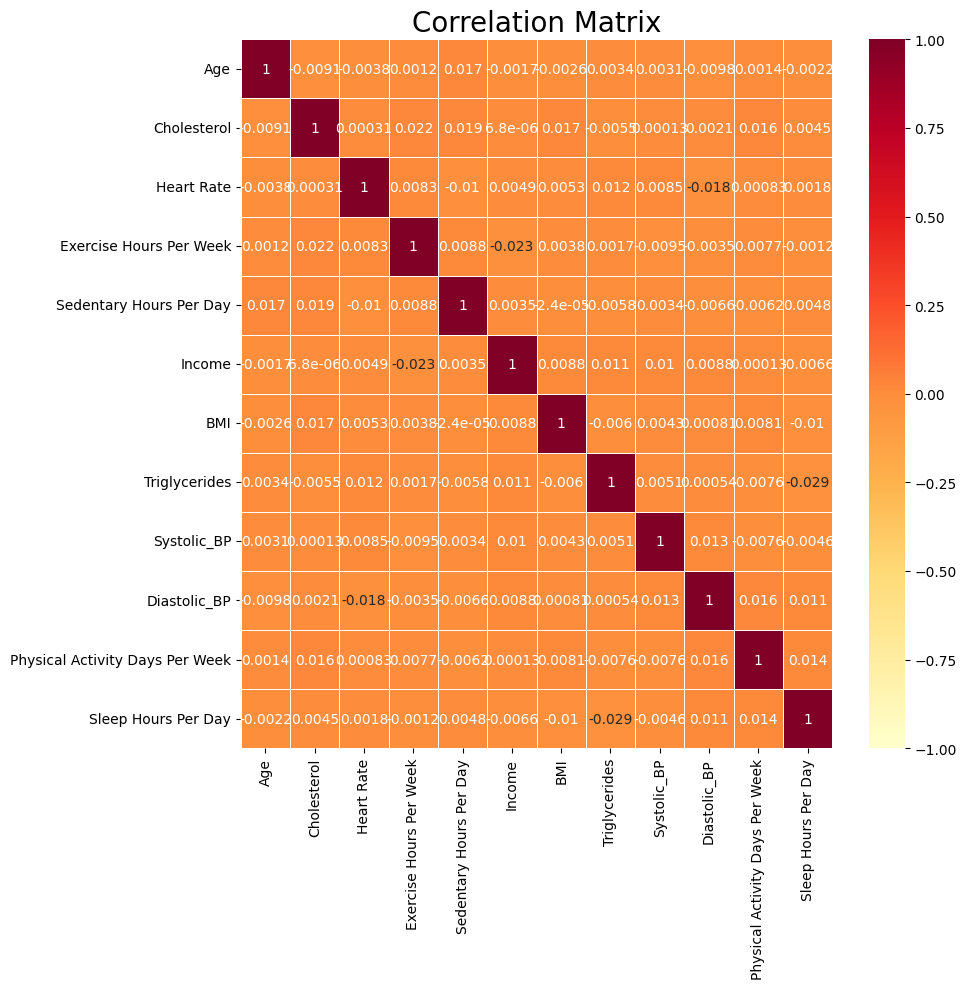

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new DataFrame with only numerical columns and the Heart Risk column
matrix_df = df[numerical_columns]

# Create the correlation matrix
corr_matrix = matrix_df.corr() 

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 10))

# Create the correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', vmin=-1, vmax=1, center=0, linewidths=.5, ax=ax)

# Set the title and axis labels
ax.set_title('Correlation Matrix', fontsize=20)

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=90)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

Important numeric variables:
BMI,
Heart Rate,
Exercise Hours Per Week,
Sedentary Hours Per Day,
Cholesterol,
Diastolic_BP,
Physical Activity Days Per Week.

# Model Selection Before Feature Selection

### Feature enginerring 

In [50]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical columns
encoded_array = encoder.fit_transform(df[categorical_columns]).toarray()

# Create a DataFrame with the one-hot encoded columns
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the original DataFrame with the one-hot encoded DataFrame
df = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

# Print the final DataFrame
df

,Age,Cholesterol,Heart Rate,Exercise Hours Per Week,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,...,Country_Nigeria,Country_South Africa,Country_South Korea,Country_Spain,Country_Thailand,Country_United Kingdom,Country_United States,Country_Vietnam,Hemisphere_0,Hemisphere_1
0,67,208,72,4.168189,6.615001,261404,31.251233,286,0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,21,389,98,1.813242,4.963459,285768,27.194973,235,1,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,21,324,72,2.078353,9.463426,235282,28.176571,587,4,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,84,383,73,9.828130,7.648981,125640,36.464704,378,3,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,66,318,93,5.804299,1.514821,160555,21.809144,231,1,5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,121,61,7.917342,10.806373,235420,19.655895,67,7,7,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8759,28,120,73,16.558426,3.833038,217881,23.993866,617,4,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8760,47,250,105,3.148438,2.375214,36998,35.406146,527,4,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8761,36,178,60,3.789950,0.029104,209943,27.294020,114,2,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Train Test Split 

In [51]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import LabelEncoder

In [52]:
X = df.drop('Heart Attack Risk', axis=1)
y = df["Heart Attack Risk"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

X_train

,Age,Cholesterol,Heart Rate,Exercise Hours Per Week,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,...,Country_Nigeria,Country_South Africa,Country_South Korea,Country_Spain,Country_Thailand,Country_United Kingdom,Country_United States,Country_Vietnam,Hemisphere_0,Hemisphere_1
5967,84,217,75,17.107142,1.737428,153618,35.185856,544,3,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8270,88,209,104,2.851698,11.876890,124693,30.991599,649,2,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
100,90,224,98,3.560949,9.618701,154900,22.851796,255,4,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3410,27,376,65,19.035090,1.968503,151338,37.513424,796,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1790,55,270,94,0.968271,7.252388,81127,23.269040,450,2,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,48,334,43,15.423465,2.091589,59858,33.549888,549,4,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5191,68,188,69,11.689453,0.923109,60332,26.142883,410,2,9,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5390,32,169,84,11.639443,5.730149,67604,39.512660,777,4,9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
860,85,285,54,11.070968,8.001822,138980,25.499506,552,1,10,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [53]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(
    X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(
    X_test), columns=X_train.columns, index=X_test.index)

X_train_scaled.head()

,Age,Cholesterol,Heart Rate,Exercise Hours Per Week,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,...,Country_Nigeria,Country_South Africa,Country_South Korea,Country_Spain,Country_Thailand,Country_United Kingdom,Country_United States,Country_Vietnam,Hemisphere_0,Hemisphere_1
5967,1.420091,-0.534475,-0.000290,1.233286,-1.231346,-0.059059,1.002959,0.576593,-0.212962,-0.518791,...,-0.240071,-0.223674,-0.220491,-0.231304,-0.225426,-0.233351,-0.229932,-0.227861,0.738752,-0.738752
8270,1.608357,-0.633314,1.404279,-1.234317,1.698931,-0.416601,0.337606,1.046836,-0.652427,-1.522717,...,-0.240071,-0.223674,-0.220491,-0.231304,-0.225426,-0.233351,-0.229932,-0.227861,0.738752,-0.738752
100,1.702491,-0.447991,1.113679,-1.111547,1.046321,-0.043212,-0.953647,-0.717692,0.226503,-1.020754,...,-0.240071,-0.223674,-0.220491,-0.231304,-0.225426,-0.233351,-0.229932,-0.227861,-1.353633,1.353633
3410,-1.262709,1.429952,-0.484624,1.567012,-1.164566,-0.087242,1.372191,1.705175,-1.091893,-1.522717,...,-0.240071,-0.223674,-0.220491,-0.231304,-0.225426,-0.233351,-0.229932,-0.227861,0.738752,-0.738752
1790,0.055157,0.120334,0.919945,-1.560337,0.362463,-0.955120,-0.887458,0.155615,-0.652427,-1.522717,...,-0.240071,4.470797,-0.220491,-0.231304,-0.225426,-0.233351,-0.229932,-0.227861,-1.353633,1.353633


## Logistic Regression

#### Training and Testing on Unbalanced Data

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Create the logistic regression model
model = LogisticRegression(solver='liblinear')

folds = KFold(n_splits=5, shuffle=True, random_state=7)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=folds)
grid_search.fit(X_train_scaled, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test_scaled)
y_pred_train = best_model.predict(X_train_scaled)

print('Training accuracy score and Training F1 score:')
print(accuracy_score(y_train, y_pred_train),
      f1_score(y_train, y_pred_train, average='macro'))

print('\nTesting accuracy score and Testing F1 score:')
print(accuracy_score(y_test, y_pred_test),
      f1_score(y_test, y_pred_test, average='macro'))

Training accuracy score and Training F1 score:
0.6417974322396577 0.39091146059605525

Testing accuracy score and Testing F1 score:
0.6423274386765545 0.3926221504581316


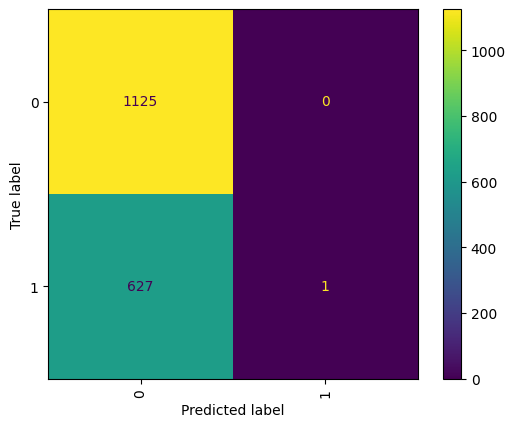

In [55]:
#Confusion Matrix 
metrics.ConfusionMatrixDisplay.from_predictions(y_test,
                                                y_pred_test,
                                                xticks_rotation='vertical')
plt.show()

In [56]:
print(metrics.classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       1.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.82      0.50      0.39      1753
weighted avg       0.77      0.64      0.50      1753



### Resampling

In [57]:
# Install the imbalanced-learn library
#!pip install imbalanced-learn

# Import the necessary modules
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

smote = SMOTE()
rus = RandomUnderSampler()
smoteenn = SMOTEENN()
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)
X_test_resampled, y_test_resampled = rus.fit_resample(X_test_scaled, y_test)



#### Training on Balanced Data and Testing on unbalanced data

In [58]:
# Define the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Create the logistic regression model
model = LogisticRegression(solver='liblinear')

folds = KFold(n_splits=5, shuffle=True, random_state=7)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=folds)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test_scaled)
y_pred_train = best_model.predict(X_train_resampled)

print('Training accuracy score and Training F1 score:')
print(accuracy_score(y_train_resampled, y_pred_train),
      f1_score(y_train_resampled, y_pred_train, average='macro'))

print('\nTesting accuracy score and Testing F1 score:')
print(accuracy_score(y_test, y_pred_test),
      f1_score(y_test, y_pred_test, average='macro'))

Training accuracy score and Training F1 score:
0.5461967343687774 0.5461967163753367

Testing accuracy score and Testing F1 score:
0.4854535082715345 0.4753725995036431


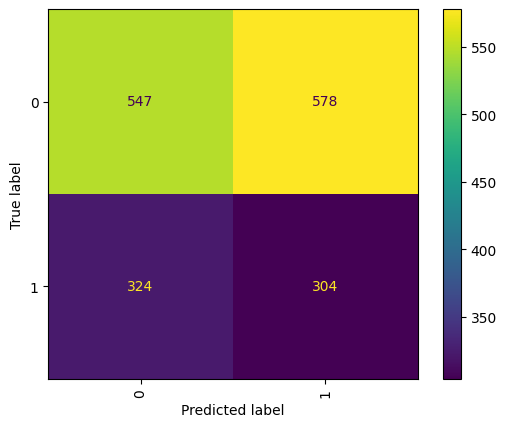

In [59]:
#Confusion Matrix 
metrics.ConfusionMatrixDisplay.from_predictions(y_test,
                                                y_pred_test,
                                                xticks_rotation='vertical')
plt.show()

In [60]:
print(metrics.classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.63      0.49      0.55      1125
           1       0.34      0.48      0.40       628

    accuracy                           0.49      1753
   macro avg       0.49      0.49      0.48      1753
weighted avg       0.53      0.49      0.50      1753



### Making synthentic predictions

In [61]:
from sklearn.datasets import make_classification

# Generate 1000 synthetic samples with the same number of features as the original data
X_synth, y_synth = make_classification(n_samples=10, n_features=X_train.shape[1], random_state=42)

y_synth_pred = best_model.predict(X_synth)

In [62]:
# Print the individual predictions
print("Actual Labels:", y_synth)
print("Predicted Labels:", y_synth_pred)

Actual Labels: [0 1 1 0 1 0 1 1 0 0]
Predicted Labels: [1 1 1 0 0 1 1 0 0 1]


In [63]:
print("Accuracy:", accuracy_score(y_synth, y_synth_pred))


Accuracy: 0.5


#### Training and Testing on Balanced Data

In [64]:
# Define the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Create the logistic regression model
model = LogisticRegression(solver='liblinear')

folds = KFold(n_splits=5, shuffle=True, random_state=7)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=folds)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test_resampled)
y_pred_train = best_model.predict(X_train_resampled)

print('Training accuracy score and Training F1 score:')
print(accuracy_score(y_train_resampled, y_pred_train),
      f1_score(y_train_resampled, y_pred_train, average='macro'))

print('\nTesting accuracy score and Testing F1 score:')
print(accuracy_score(y_test_resampled, y_pred_test),
      f1_score(y_test_resampled, y_pred_test, average='macro'))

Training accuracy score and Training F1 score:
0.5457984866587017 0.545798324575568

Testing accuracy score and Testing F1 score:
0.4872611464968153 0.4872559460418885


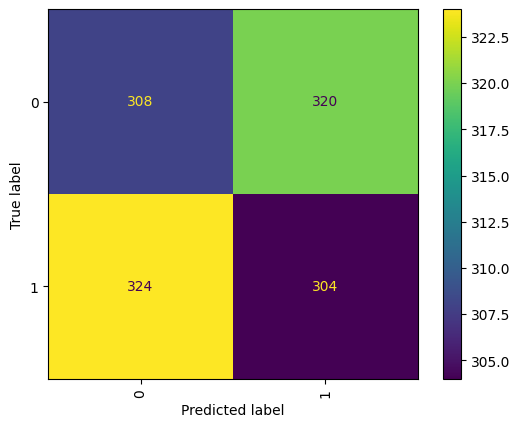

In [65]:
#Confusion Matrix 
metrics.ConfusionMatrixDisplay.from_predictions(y_test_resampled,
                                                y_pred_test,
                                                xticks_rotation='vertical')
plt.show()

In [66]:
print(metrics.classification_report(y_test_resampled,y_pred_test))

              precision    recall  f1-score   support

           0       0.49      0.49      0.49       628
           1       0.49      0.48      0.49       628

    accuracy                           0.49      1256
   macro avg       0.49      0.49      0.49      1256
weighted avg       0.49      0.49      0.49      1256



## SVM

In [67]:
from sklearn.model_selection import GridSearchCV, KFold

#K fold cross validation and grid search

folds = KFold(n_splits=5, shuffle=True, random_state=7)
model = SVC()


params = {'C': [0.1, 1, 10, 100, 1000, 2000],
          'gamma': [1, 0.1, 0.01]}

c_opt = GridSearchCV(estimator=model, param_grid=params,
                     scoring='f1_macro', cv=folds, n_jobs=-1,
                     verbose=1, return_train_score=True)

c_opt.fit(X_train_scaled, y_train)
c_results = pd.DataFrame(c_opt.cv_results_)
c_results

Fitting 5 folds for each of 18 candidates, totalling 90 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,10.100908,0.159265,4.032076,0.297339,0.1,1.00,"{'C': 0.1, 'gamma': 1}",0.383194,0.387238,0.394123,...,0.390874,0.004813,9,0.392811,0.391823,0.390103,0.389771,0.390037,0.390909,0.001196
1,9.732944,0.493300,4.564729,0.620164,0.1,0.10,"{'C': 0.1, 'gamma': 0.1}",0.383194,0.387238,0.394123,...,0.390874,0.004813,9,0.392811,0.391823,0.390103,0.389771,0.390037,0.390909,0.001196
2,9.509481,0.701054,3.732116,0.606725,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.383194,0.387238,0.394123,...,0.390874,0.004813,9,0.392811,0.391823,0.390103,0.389771,0.390037,0.390909,0.001196
3,11.184085,1.021513,4.633197,0.419457,1.0,1.00,"{'C': 1, 'gamma': 1}",0.383194,0.387238,0.394123,...,0.390874,0.004813,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,11.050822,0.681320,4.968235,0.187137,1.0,0.10,"{'C': 1, 'gamma': 0.1}",0.383194,0.387238,0.393861,...,0.390769,0.004741,18,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,11.961990,1.680658,4.728629,0.978383,1.0,0.01,"{'C': 1, 'gamma': 0.01}",0.383194,0.387238,0.394123,...,0.390874,0.004813,9,0.392811,0.393452,0.393852,0.390307,0.391646,0.392414,0.001291
6,13.891932,1.487744,5.782029,1.253606,10.0,1.00,"{'C': 10, 'gamma': 1}",0.383194,0.387238,0.394123,...,0.390874,0.004813,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,12.734806,2.411382,5.041048,0.644448,10.0,0.10,"{'C': 10, 'gamma': 0.1}",0.391050,0.391849,0.395817,...,0.396436,0.004616,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,16.310337,1.645375,4.794308,1.224886,10.0,0.01,"{'C': 10, 'gamma': 0.01}",0.482907,0.487790,0.494195,...,0.486146,0.004946,4,0.919016,0.922902,0.923844,0.923314,0.924155,0.922646,0.001866
9,14.328007,1.899173,5.617395,1.223697,100.0,1.00,"{'C': 100, 'gamma': 1}",0.383194,0.387238,0.394123,...,0.390874,0.004813,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [68]:
#best score and best parameters
best_score = c_opt.best_score_
best_params = c_opt.best_params_

print(f'Best Score: {best_score}')
print(f'Best Parameters: {best_params}')

Best Score: 0.5021889987130762
Best Parameters: {'C': 100, 'gamma': 0.01}


#### Training and Testing on unbalanced data

In [69]:
model_scaled = SVC(gamma=0.01, C=100)
model_scaled.fit(X_train_scaled, y_train)


y_pred_train = model_scaled.predict(X_train_scaled)
y_pred = model_scaled.predict(X_test_scaled)


print('Training Accuracy and Training F1 (macro)')
print(metrics.accuracy_score(y_train, y_pred_train),
      metrics.f1_score(y_train, y_pred_train, average='macro'))

print('\nTesting Accuracy and Testing F1 (macro)')
print(metrics.accuracy_score(y_test, y_pred),
      metrics.f1_score(y_test, y_pred, average='macro'))

Training Accuracy and Training F1 (macro)
1.0 1.0

Testing Accuracy and Testing F1 (macro)
0.5482030804335425 0.5014163410710182


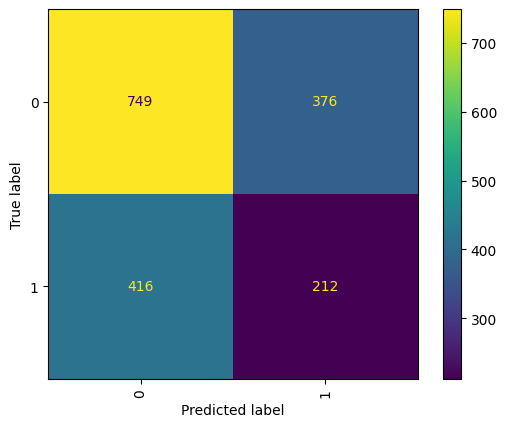

In [70]:
#Confusion Matrix 
metrics.ConfusionMatrixDisplay.from_predictions(y_test,
                                                y_pred,
                                                xticks_rotation='vertical')
plt.show()

In [71]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.67      0.65      1125
           1       0.36      0.34      0.35       628

    accuracy                           0.55      1753
   macro avg       0.50      0.50      0.50      1753
weighted avg       0.54      0.55      0.54      1753



#### Training and Testing on balanced data

In [72]:
model_scaled = SVC(gamma=0.1, C=100)
model_scaled.fit(X_train_resampled, y_train_resampled)


y_pred_train = model_scaled.predict(X_train_resampled)
y_pred = model_scaled.predict(X_test_resampled)


print('Training accuracy score and Training F1 score:')
print(accuracy_score(y_train_resampled, y_pred_train),
      f1_score(y_train_resampled, y_pred_train, average='macro'))

print('\nTesting accuracy score and Testing F1 score:')
print(accuracy_score(y_test_resampled, y_pred),
      f1_score(y_test_resampled, y_pred, average='macro'))

Training accuracy score and Training F1 score:
1.0 1.0

Testing accuracy score and Testing F1 score:
0.5 0.49932843305277325


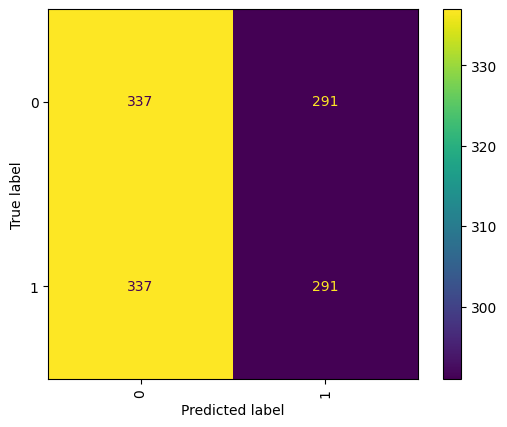

In [73]:
#Confusion Matrix 
metrics.ConfusionMatrixDisplay.from_predictions(y_test_resampled,
                                                y_pred,
                                                xticks_rotation='vertical')
plt.show()

In [74]:
print(metrics.classification_report(y_test_resampled,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.54      0.52       628
           1       0.50      0.46      0.48       628

    accuracy                           0.50      1256
   macro avg       0.50      0.50      0.50      1256
weighted avg       0.50      0.50      0.50      1256



#### Training on balanced data and Testing on unbalanced data

In [75]:
model_scaled = SVC(gamma=0.1, C=100)
model_scaled.fit(X_train_resampled, y_train_resampled)


y_pred_train = model_scaled.predict(X_train_resampled)
y_pred = model_scaled.predict(X_test_scaled)


print('Training accuracy score and Training F1 score:')
print(accuracy_score(y_train_resampled, y_pred_train),
      f1_score(y_train_resampled, y_pred_train, average='macro'))

print('\nTesting accuracy score and Testing F1 score:')
print(accuracy_score(y_test, y_pred),
      f1_score(y_test, y_pred, average='macro'))

Training accuracy score and Training F1 score:
1.0 1.0

Testing accuracy score and Testing F1 score:
0.4860239589275528 0.47353479490245187


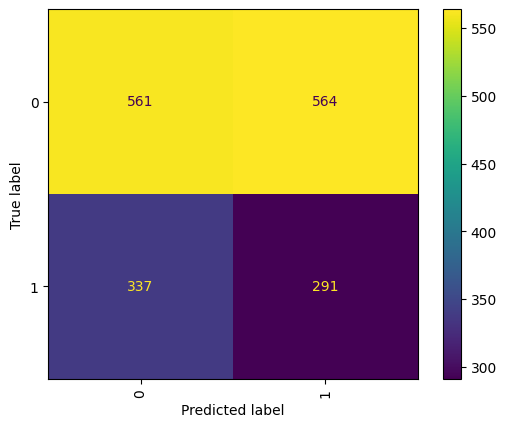

In [76]:
#Confusion Matrix 
metrics.ConfusionMatrixDisplay.from_predictions(y_test,
                                                y_pred,
                                                xticks_rotation='vertical')
plt.show()

In [77]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.50      0.55      1125
           1       0.34      0.46      0.39       628

    accuracy                           0.49      1753
   macro avg       0.48      0.48      0.47      1753
weighted avg       0.52      0.49      0.50      1753



### Making Synthetic Predictions 

In [78]:
from sklearn.datasets import make_classification

# Generate 1000 synthetic samples with the same number of features as the original data
X_synth, y_synth = make_classification(n_samples=10, n_features=X_train.shape[1], random_state=42)

y_synth_pred = model_scaled.predict(X_synth)

In [79]:
# Print the individual predictions
print("Actual Labels:", y_synth)
print("Predicted Labels:", y_synth_pred)

Actual Labels: [0 1 1 0 1 0 1 1 0 0]
Predicted Labels: [1 1 1 1 1 1 1 1 1 1]


In [80]:
print("Accuracy:", accuracy_score(y_synth, y_synth_pred))

Accuracy: 0.5


# Model Selection After Feature Selection

In [81]:

selected_categorical = ['Diabetes', 'Obesity', 'Alcohol Consumption', 'Hemisphere']

selected_numerical = ['Cholesterol', 'BMI', 'Exercise Hours Per Week', 'Heart Rate', 'Physical Activity Days Per Week', 
                      'Sedentary Hours Per Day', 'Diastolic_BP']

selected_variables = ['Diabetes', 'Obesity', 'Alcohol Consumption', 'Hemisphere', 'Cholesterol', 'BMI', 
                      'Exercise Hours Per Week', 'Heart Rate', 'Physical Activity Days Per Week', 'Sedentary Hours Per Day', 'Diastolic_BP', 'Heart Attack Risk']

data = df1[selected_variables]
data

,Diabetes,Obesity,Alcohol Consumption,Hemisphere,Cholesterol,BMI,Exercise Hours Per Week,Heart Rate,Physical Activity Days Per Week,Sedentary Hours Per Day,Diastolic_BP,Heart Attack Risk
0,0,0,0,1,208,31.251233,4.168189,72,0,6.615001,88,0
1,1,1,1,0,389,27.194973,1.813242,98,1,4.963459,93,0
2,1,0,0,0,324,28.176571,2.078353,72,4,9.463426,99,0
3,1,0,1,0,383,36.464704,9.828130,73,3,7.648981,100,0
4,1,1,0,0,318,21.809144,5.804299,93,1,1.514821,88,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8758,1,0,1,0,121,19.655895,7.917342,61,7,10.806373,76,0
8759,1,1,0,0,120,23.993866,16.558426,73,4,3.833038,102,0
8760,0,1,1,1,250,35.406146,3.148438,105,4,2.375214,75,1
8761,1,0,0,1,178,27.294020,3.789950,60,2,0.029104,67,0


### Feature Engineering

In [82]:

from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical columns
encoded_array = encoder.fit_transform(data[selected_categorical]).toarray()

# Create a DataFrame with the one-hot encoded columns
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(selected_categorical))

# Concatenate the original DataFrame with the one-hot encoded DataFrame
data = pd.concat([data.drop(columns=selected_categorical), encoded_df], axis=1)

#data['Heart Attack Risk'] = data['Heart Attack Risk'].astype('int')

# Print the final DataFrame
data

,Cholesterol,BMI,Exercise Hours Per Week,Heart Rate,Physical Activity Days Per Week,Sedentary Hours Per Day,Diastolic_BP,Heart Attack Risk,Diabetes_0,Diabetes_1,Obesity_0,Obesity_1,Alcohol Consumption_0,Alcohol Consumption_1,Hemisphere_0,Hemisphere_1
0,208,31.251233,4.168189,72,0,6.615001,88,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,389,27.194973,1.813242,98,1,4.963459,93,0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,324,28.176571,2.078353,72,4,9.463426,99,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,383,36.464704,9.828130,73,3,7.648981,100,0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,318,21.809144,5.804299,93,1,1.514821,88,0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,121,19.655895,7.917342,61,7,10.806373,76,0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
8759,120,23.993866,16.558426,73,4,3.833038,102,0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
8760,250,35.406146,3.148438,105,4,2.375214,75,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
8761,178,27.294020,3.789950,60,2,0.029104,67,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


### Train Test Split

In [83]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import LabelEncoder

In [84]:
X = data.drop('Heart Attack Risk', axis=1)
y = data["Heart Attack Risk"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

X_train

,Cholesterol,BMI,Exercise Hours Per Week,Heart Rate,Physical Activity Days Per Week,Sedentary Hours Per Day,Diastolic_BP,Diabetes_0,Diabetes_1,Obesity_0,Obesity_1,Alcohol Consumption_0,Alcohol Consumption_1,Hemisphere_0,Hemisphere_1
5967,217,35.185856,17.107142,75,3,1.737428,83,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
8270,209,30.991599,2.851698,104,2,11.876890,72,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
100,224,22.851796,3.560949,98,4,9.618701,65,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3410,376,37.513424,19.035090,65,1,1.968503,70,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1790,270,23.269040,0.968271,94,2,7.252388,81,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,334,33.549888,15.423465,43,4,2.091589,82,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
5191,188,26.142883,11.689453,69,2,0.923109,70,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5390,169,39.512660,11.639443,84,4,5.730149,79,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
860,285,25.499506,11.070968,54,1,8.001822,73,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


In [85]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(
    X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(
    X_test), columns=X_train.columns, index=X_test.index)

X_train_scaled.head()

,Cholesterol,BMI,Exercise Hours Per Week,Heart Rate,Physical Activity Days Per Week,Sedentary Hours Per Day,Diastolic_BP,Diabetes_0,Diabetes_1,Obesity_0,Obesity_1,Alcohol Consumption_0,Alcohol Consumption_1,Hemisphere_0,Hemisphere_1
5967,-0.534475,1.002959,1.233286,-0.000290,-0.212962,-1.231346,-0.143121,-0.733454,0.733454,-0.994594,0.994594,-0.825505,0.825505,0.738752,-0.738752
8270,-0.633314,0.337606,-1.234317,1.404279,-0.652427,1.698931,-0.890366,-0.733454,0.733454,1.005436,-1.005436,-0.825505,0.825505,0.738752,-0.738752
100,-0.447991,-0.953647,-1.111547,1.113679,0.226503,1.046321,-1.365885,-0.733454,0.733454,1.005436,-1.005436,-0.825505,0.825505,-1.353633,1.353633
3410,1.429952,1.372191,1.567012,-0.484624,-1.091893,-1.164566,-1.026229,1.363411,-1.363411,1.005436,-1.005436,-0.825505,0.825505,0.738752,-0.738752
1790,0.120334,-0.887458,-1.560337,0.919945,-0.652427,0.362463,-0.278984,1.363411,-1.363411,-0.994594,0.994594,-0.825505,0.825505,-1.353633,1.353633


## Logistic Regression

#### Training and Testing on Unbalanced Data

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Create the logistic regression model
model = LogisticRegression(solver='liblinear')

folds = KFold(n_splits=5, shuffle=True, random_state=7)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=folds)
grid_search.fit(X_train_scaled, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test_scaled)
y_pred_train = best_model.predict(X_train_scaled)

print('Training accuracy score and Training F1 score:')
print(accuracy_score(y_train, y_pred_train),
      f1_score(y_train, y_pred_train, average='macro'))

print('\nTesting accuracy score and Testing F1 score:')
print(accuracy_score(y_test, y_pred_test),
      f1_score(y_test, y_pred_test, average='macro'))

Training accuracy score and Training F1 score:
0.6417974322396577 0.39091146059605525

Testing accuracy score and Testing F1 score:
0.6417569880205363 0.39089645587213345


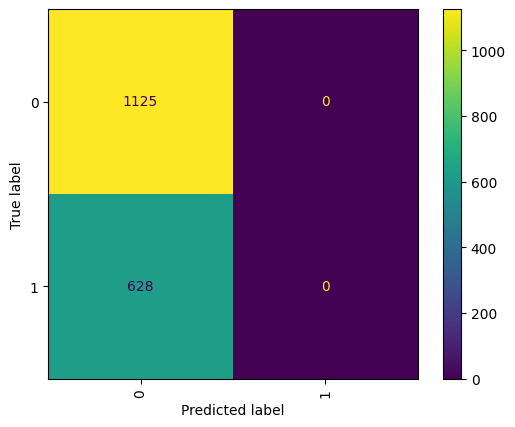

In [87]:
#Confusion Matrix 
metrics.ConfusionMatrixDisplay.from_predictions(y_test,
                                                y_pred_test,
                                                xticks_rotation='vertical')
plt.show()

In [88]:
print(metrics.classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753



## Resampling

In [89]:
# Install the imbalanced-learn library
#!pip install imbalanced-learn

# Import the necessary modules
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

smote = SMOTE()
rus = RandomUnderSampler()
smoteenn = SMOTEENN()
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)
X_test_resampled, y_test_resampled = rus.fit_resample(X_test_scaled, y_test)

#### Training on Balanced Data and Testing on unbalanced data

In [90]:
# Define the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Create the logistic regression model
model = LogisticRegression(solver='liblinear')

folds = KFold(n_splits=5, shuffle=True, random_state=7)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=folds)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test_scaled)
y_pred_train = best_model.predict(X_train_resampled)

print('Training accuracy score and Training F1 score:')
print(accuracy_score(y_train_resampled, y_pred_train),
      f1_score(y_train_resampled, y_pred_train, average='macro'))

print('\nTesting accuracy score and Testing F1 score:')
print(accuracy_score(y_test, y_pred_test),
      f1_score(y_test, y_pred_test, average='macro'))

Training accuracy score and Training F1 score:
0.5246913580246914 0.5246911884094174

Testing accuracy score and Testing F1 score:
0.5048488305761551 0.4948193891102257


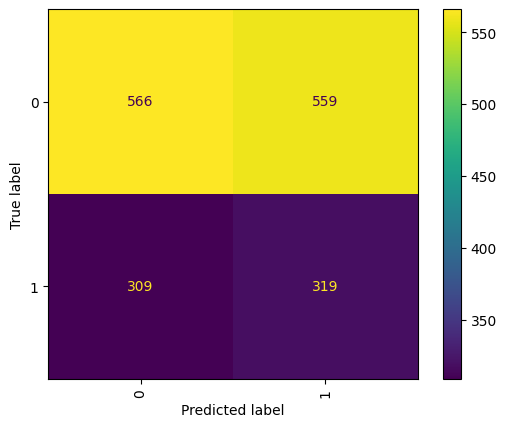

In [91]:
#Confusion Matrix 
metrics.ConfusionMatrixDisplay.from_predictions(y_test,
                                                y_pred_test,
                                                xticks_rotation='vertical')
plt.show()

In [92]:
print(metrics.classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.65      0.50      0.57      1125
           1       0.36      0.51      0.42       628

    accuracy                           0.50      1753
   macro avg       0.51      0.51      0.49      1753
weighted avg       0.55      0.50      0.52      1753



#### Training and Testing on Balanced Data

In [93]:
# Define the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Create the logistic regression model
model = LogisticRegression(solver='liblinear')

folds = KFold(n_splits=5, shuffle=True, random_state=7)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=folds)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test_resampled)
y_pred_train = best_model.predict(X_train_resampled)

print('Training accuracy score and Training F1 score:')
print(accuracy_score(y_train_resampled, y_pred_train),
      f1_score(y_train_resampled, y_pred_train, average='macro'))

print('\nTesting accuracy score and Testing F1 score:')
print(accuracy_score(y_test_resampled, y_pred_test),
      f1_score(y_test_resampled, y_pred_test, average='macro'))

Training accuracy score and Training F1 score:
0.5246913580246914 0.5246911884094174

Testing accuracy score and Testing F1 score:
0.5135350318471338 0.5135199212418232


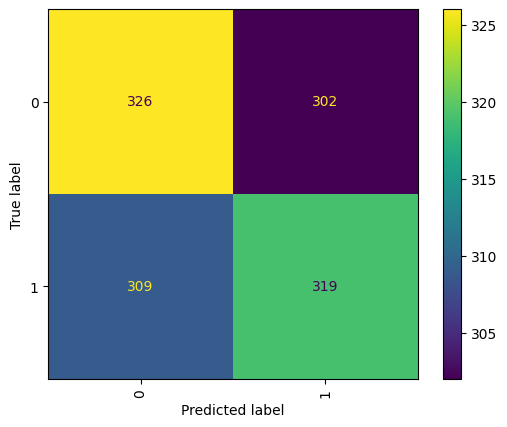

In [94]:
#Confusion Matrix 
metrics.ConfusionMatrixDisplay.from_predictions(y_test_resampled,
                                                y_pred_test,
                                                xticks_rotation='vertical')
plt.show()

In [95]:
print(metrics.classification_report(y_test_resampled,y_pred_test))

              precision    recall  f1-score   support

           0       0.51      0.52      0.52       628
           1       0.51      0.51      0.51       628

    accuracy                           0.51      1256
   macro avg       0.51      0.51      0.51      1256
weighted avg       0.51      0.51      0.51      1256



## SVM

In [96]:
from sklearn.model_selection import GridSearchCV, KFold

#K fold cross validation and grid search

folds = KFold(n_splits=5, shuffle=True, random_state=7)
model = SVC()


params = {'C': [0.1, 1, 10, 100, 1000, 2000],
          'gamma': [1, 0.1, 0.01]}

c_opt = GridSearchCV(estimator=model, param_grid=params,
                     scoring='f1_macro', cv=folds, n_jobs=-1,
                     verbose=1, return_train_score=True)

c_opt.fit(X_train_scaled, y_train)
c_results = pd.DataFrame(c_opt.cv_results_)
c_results

Fitting 5 folds for each of 18 candidates, totalling 90 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.481413,0.231967,3.355850,0.198903,0.1,1.00,"{'C': 0.1, 'gamma': 1}",0.383194,0.387238,0.394123,...,0.390874,0.004813,13,0.392811,0.391823,0.390103,0.389771,0.390037,0.390909,0.001196
1,5.284355,0.292839,2.693756,0.175333,0.1,0.10,"{'C': 0.1, 'gamma': 0.1}",0.383194,0.387238,0.394123,...,0.390874,0.004813,13,0.392811,0.391823,0.390103,0.389771,0.390037,0.390909,0.001196
2,3.864347,0.190324,2.492965,0.216110,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.383194,0.387238,0.394123,...,0.390874,0.004813,13,0.392811,0.391823,0.390103,0.389771,0.390037,0.390909,0.001196
3,5.166925,0.294399,3.389207,0.283502,1.0,1.00,"{'C': 1, 'gamma': 1}",0.417925,0.425974,0.435110,...,0.425509,0.006554,10,0.971814,0.974525,0.974491,0.977302,0.975288,0.974684,0.001762
4,5.187644,0.541505,2.833704,0.115240,1.0,0.10,"{'C': 1, 'gamma': 0.1}",0.392499,0.396248,0.405236,...,0.396550,0.004529,12,0.416495,0.415128,0.409801,0.413187,0.411354,0.413193,0.002431
5,7.875533,0.925286,2.911981,0.246184,1.0,0.01,"{'C': 1, 'gamma': 0.01}",0.383194,0.387238,0.394123,...,0.390874,0.004813,13,0.392811,0.391823,0.390103,0.389771,0.390037,0.390909,0.001196
6,6.075896,0.764172,3.117006,0.168280,10.0,1.00,"{'C': 10, 'gamma': 1}",0.476203,0.459135,0.486908,...,0.477209,0.009656,8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,7.000085,0.390244,2.708397,0.097323,10.0,0.10,"{'C': 10, 'gamma': 0.1}",0.503918,0.486670,0.503525,...,0.497198,0.006316,2,0.741200,0.758192,0.751628,0.753702,0.744592,0.749863,0.006165
8,15.405716,0.711681,2.558998,0.132721,10.0,0.01,"{'C': 10, 'gamma': 0.01}",0.383194,0.387238,0.394123,...,0.390874,0.004813,13,0.392811,0.391823,0.390103,0.389771,0.390037,0.390909,0.001196
9,5.459269,0.154661,3.060811,0.133218,100.0,1.00,"{'C': 100, 'gamma': 1}",0.476203,0.459135,0.486908,...,0.477489,0.009820,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [97]:
#best score and best parameters
best_score = c_opt.best_score_
best_params = c_opt.best_params_

print(f'Best Score: {best_score}')
print(f'Best Parameters: {best_params}')

Best Score: 0.4985910620736488
Best Parameters: {'C': 100, 'gamma': 0.1}


#### SVM Model based on best params

##### Training on balaced data and testing on unbalanced data

In [98]:

model_scaled = SVC(gamma=0.1, C=100)
model_scaled.fit(X_train_resampled, y_train_resampled)


y_pred_train = model_scaled.predict(X_train_resampled)
y_pred = model_scaled.predict(X_test_scaled)


print('Training accuracy score and Training F1 score:')
print(accuracy_score(y_train_resampled, y_pred_train),
      f1_score(y_train_resampled, y_pred_train, average='macro'))

print('\nTesting accuracy score and Testing F1 score:')
print(accuracy_score(y_test, y_pred),
      f1_score(y_test, y_pred, average='macro'))

Training accuracy score and Training F1 score:
0.9241338112305855 0.9241337841575149

Testing accuracy score and Testing F1 score:
0.5128351397604107 0.5001742807081272


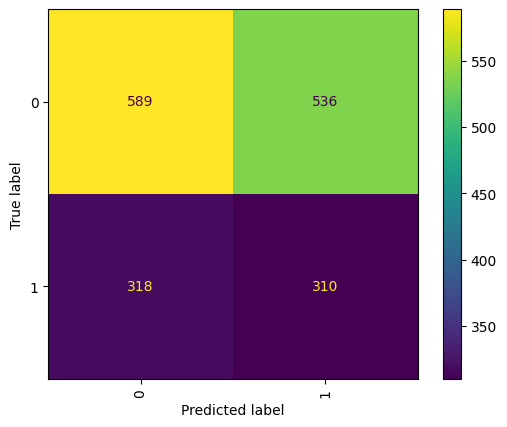

In [99]:
#Confusion Matrix 
metrics.ConfusionMatrixDisplay.from_predictions(y_test,
                                                y_pred,
                                                xticks_rotation='vertical')
plt.show()

In [100]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.52      0.58      1125
           1       0.37      0.49      0.42       628

    accuracy                           0.51      1753
   macro avg       0.51      0.51      0.50      1753
weighted avg       0.55      0.51      0.52      1753



##### Training and testing on unbalanced data

In [101]:
model_scaled = SVC(gamma=0.1, C=100)
model_scaled.fit(X_train_scaled, y_train)


y_pred_train = model_scaled.predict(X_train_scaled)
y_pred = model_scaled.predict(X_test_scaled)


print('Training Accuracy and Training F1 (macro)')
print(metrics.accuracy_score(y_train, y_pred_train),
      metrics.f1_score(y_train, y_pred_train, average='macro'))

print('\nTesting Accuracy and Testing F1 (macro)')
print(metrics.accuracy_score(y_test, y_pred),
      metrics.f1_score(y_test, y_pred, average='macro'))

Training Accuracy and Training F1 (macro)
0.9088445078459344 0.8975558037268739

Testing Accuracy and Testing F1 (macro)
0.558471192241871 0.5080927009797381


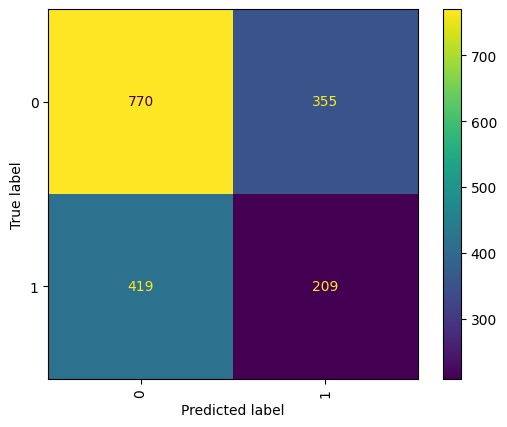

In [102]:
#Confusion Matrix 
metrics.ConfusionMatrixDisplay.from_predictions(y_test,
                                                y_pred,
                                                xticks_rotation='vertical')
plt.show()

In [103]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.68      0.67      1125
           1       0.37      0.33      0.35       628

    accuracy                           0.56      1753
   macro avg       0.51      0.51      0.51      1753
weighted avg       0.55      0.56      0.55      1753



##### Training and testing on balanced data

In [104]:
model_scaled = SVC(gamma=0.1, C=100)
model_scaled.fit(X_train_resampled, y_train_resampled)


y_pred_train = model_scaled.predict(X_train_resampled)
y_pred = model_scaled.predict(X_test_resampled)


print('Training Accuracy and Training F1 (macro)')
print(metrics.accuracy_score(y_train_resampled, y_pred_train),
      metrics.f1_score(y_train_resampled, y_pred_train, average='macro'))

print('\nTesting Accuracy and Testing F1 (macro)')
print(metrics.accuracy_score(y_test_resampled, y_pred),
      metrics.f1_score(y_test_resampled, y_pred, average='macro'))

Training Accuracy and Training F1 (macro)
0.9241338112305855 0.9241337841575149

Testing Accuracy and Testing F1 (macro)
0.5015923566878981 0.5015607606267386


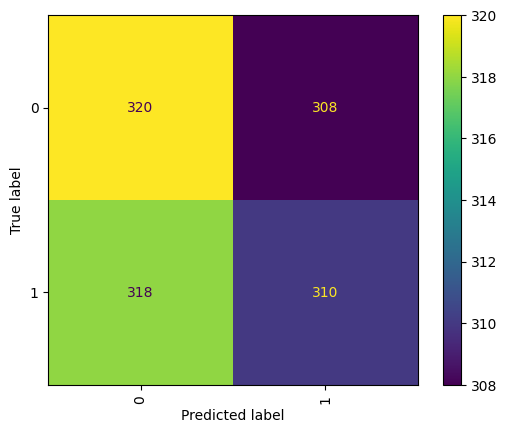

In [105]:
#Confusion Matrix 
metrics.ConfusionMatrixDisplay.from_predictions(y_test_resampled,
                                                y_pred,
                                                xticks_rotation='vertical')
plt.show()

In [106]:
print(metrics.classification_report(y_test_resampled,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.51      0.51       628
           1       0.50      0.49      0.50       628

    accuracy                           0.50      1256
   macro avg       0.50      0.50      0.50      1256
weighted avg       0.50      0.50      0.50      1256



## Decision Trees

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Create a NumPy array from 1 to 49 with a step of 1
max_depths = np.arange(1, 15, 1)

# Lists to store the training and testing F1 scores
train_f1_scores = []
test_f1_scores = []

# Loop through the max_depth values and fit the models
for max_depth in max_depths:
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    train_f1_scores.append(train_f1)

    y_test_pred = model.predict(X_test)
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    test_f1_scores.append(test_f1)

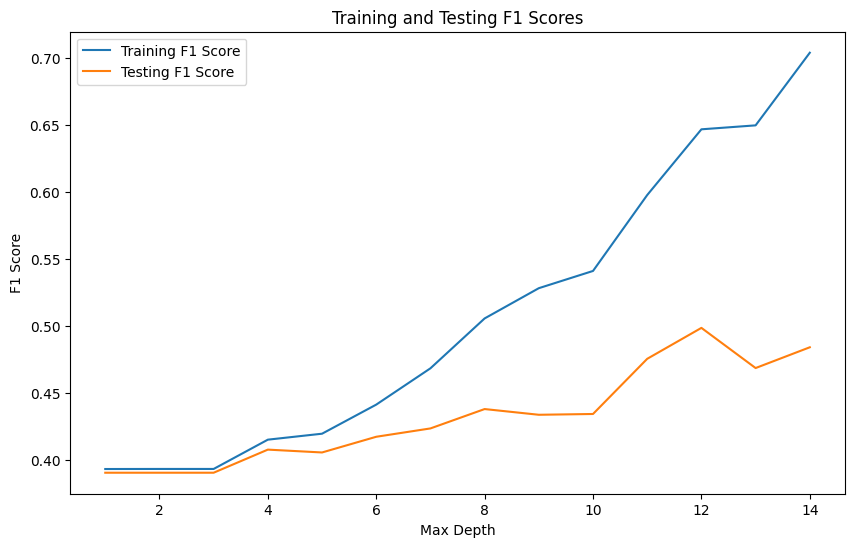

In [123]:
# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_f1_scores, label='Training F1 Score')
plt.plot(max_depths, test_f1_scores, label='Testing F1 Score')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')
plt.title('Training and Testing F1 Scores')
plt.legend()
plt.show()

The best max_depth to choose in this case would be a lower value, 5, where the training and testing F1 scores are closer together and the model is not overfitting.

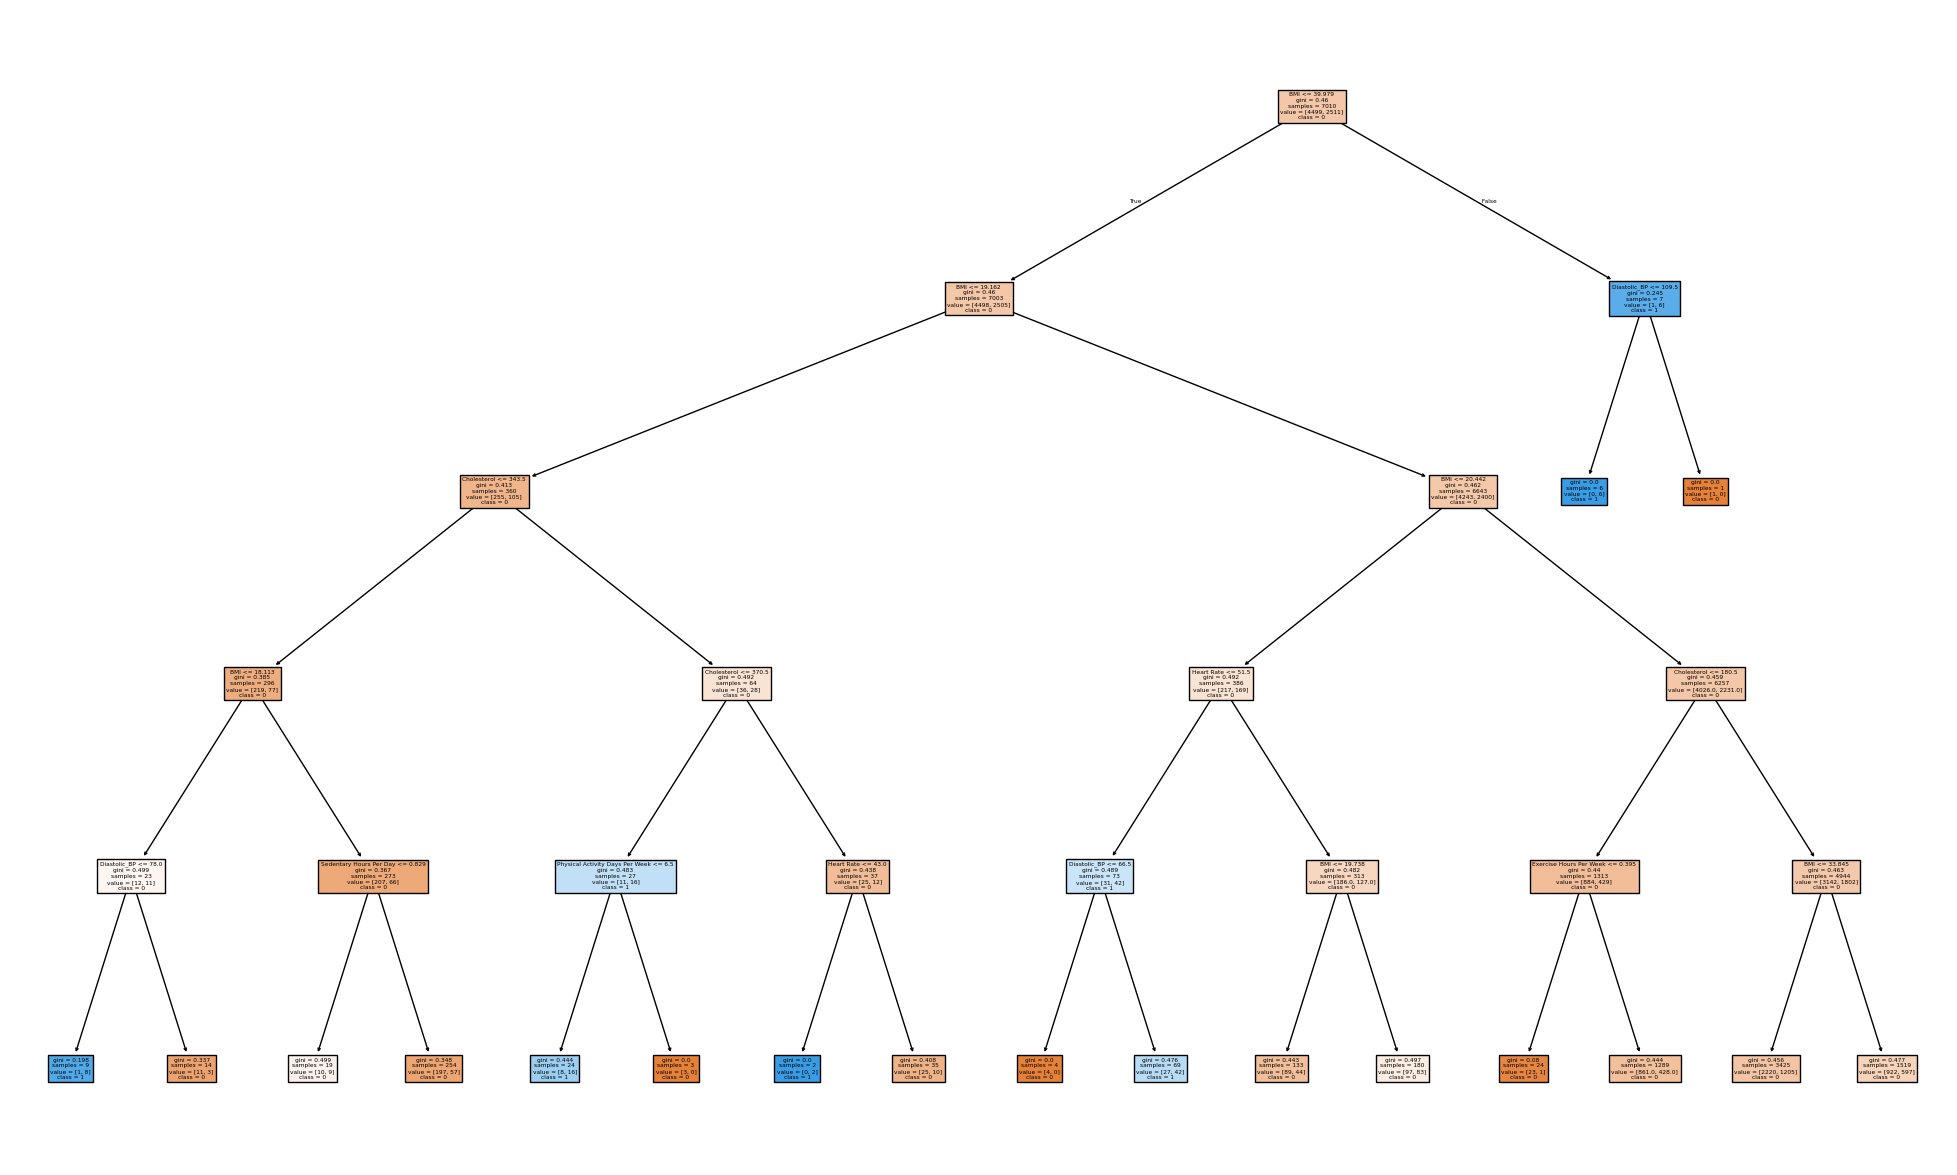

In [124]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train the model
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

# Convert class names to strings
class_names = list(map(str, model.classes_))

# Plot the decision tree
plt.figure(figsize=(25, 15))
_ = plot_tree(model, 
              feature_names=X_train.columns,  
              class_names=class_names,
              filled=True)
plt.show()


In [125]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_1 <= 39.98
|   |--- feature_1 <= 19.16
|   |   |--- feature_0 <= 343.50
|   |   |   |--- feature_1 <= 18.11
|   |   |   |   |--- feature_6 <= 78.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_6 >  78.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  18.11
|   |   |   |   |--- feature_5 <= 0.83
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  0.83
|   |   |   |   |   |--- class: 0
|   |   |--- feature_0 >  343.50
|   |   |   |--- feature_0 <= 370.50
|   |   |   |   |--- feature_4 <= 6.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_4 >  6.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  370.50
|   |   |   |   |--- feature_3 <= 43.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  43.00
|   |   |   |   |   |--- class: 0
|   |--- feature_1 >  19.16
|   |   |--- feature_1 <= 20.44
|   |   |   |--- feature_3 <= 51.50
|   |   |   |   |--- feature_6 <= 66.50
|   |   |   

In [126]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)


print('Training Accuracy and Training F1 (macro)')
print(metrics.accuracy_score(y_train, y_pred_train),
      metrics.f1_score(y_train, y_pred_train, average='macro'))

print('\nTesting Accuracy and Testing F1 (macro)')
print(metrics.accuracy_score(y_test, y_pred),
      metrics.f1_score(y_test, y_pred, average='macro'))

Training Accuracy and Training F1 (macro)
0.6472182596291013 0.41975907108326505

Testing Accuracy and Testing F1 (macro)
0.638904734740445 0.4057802137190379


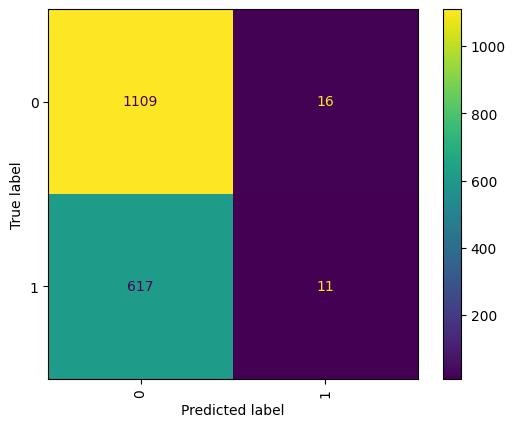

In [127]:
#Confusion Matrix 
metrics.ConfusionMatrixDisplay.from_predictions(y_test,
                                                y_pred,
                                                xticks_rotation='vertical')
plt.show()

In [128]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.99      0.78      1125
           1       0.41      0.02      0.03       628

    accuracy                           0.64      1753
   macro avg       0.52      0.50      0.41      1753
weighted avg       0.56      0.64      0.51      1753



### Making Synthetic Predictions

In [129]:
from sklearn.datasets import make_classification

# Generate 1000 synthetic samples with the same number of features as the original data
X_synth, y_synth = make_classification(n_samples=10, n_features=X_train.shape[1], random_state=42)

y_synth_pred = model.predict(X_synth)

In [130]:
# Print the individual predictions
print("Actual Labels:", y_synth)
print("Predicted Labels:", y_synth_pred)

Actual Labels: [0 1 1 0 1 1 0 0 1 0]
Predicted Labels: [1 1 1 1 1 1 1 1 1 1]


In [131]:
print("Accuracy:", accuracy_score(y_synth, y_synth_pred))

Accuracy: 0.5


## Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

voting_clf = VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                                          ('rf', RandomForestClassifier(random_state=42)),
                                          ('svc', SVC(random_state=42))])
voting_clf.voting = 'soft'
voting_clf.named_estimators['svc'].probability = True

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [115]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, ': ', clf.score(X_test, y_test))

lr :  0.6417569880205363
rf :  0.6252139189960069
svc :  0.6417569880205363


In [116]:
voting_clf.score(X_test, y_test)

0.6417569880205363

In [117]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

# Auto performs soft voting
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.6406160867084997

In [118]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.6417569880205363

In [119]:
for score, name in zip(rnd_clf.feature_importances_, X_train.columns):
    print(round(score,2), name)

0.15 Cholesterol
0.18 BMI
0.17 Exercise Hours Per Week
0.11 Heart Rate
0.05 Physical Activity Days Per Week
0.16 Sedentary Hours Per Day
0.1 Diastolic_BP
0.01 Diabetes_0
0.01 Diabetes_1
0.01 Obesity_0
0.01 Obesity_1
0.01 Alcohol Consumption_0
0.01 Alcohol Consumption_1
0.01 Hemisphere_0
0.01 Hemisphere_1


In [120]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_features='sqrt', max_leaf_nodes=16), n_estimators=500, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.6417569880205363

In [121]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=30, learning_rate=0.5, random_state=42, algorithm='SAMME')
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.6411865373645179